In [213]:
import hiivemdptoolbox.hiive.mdptoolbox as mdp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import sys

In [214]:
def callback(s, a, s_new):
    global i
    if i % 1000 == 0:
#         print(i, s, a, s_new)
        pass
    i += 1
    return True

# Small Problem

In [215]:
actions = ['Leave', 'Cut']
P, R = mdp.example.forest(S=100)

### Value Iteration

In [216]:
plot_df = pd.DataFrame(index=range(200))
start = time.time()
vi = mdp.mdp.ValueIteration(P, R, .999, max_iter=1000000, epsilon=.000001)

results = vi.run()
run_time = time.time() - start
print(run_time)
print(results[-1]['Reward'])

vi_mean_v = [x['Mean V'] for x in results]
vi_error = [x['Error'] for x in results]
vi_time = [x['Time'] for x in results]

print(sum(vi.policy))
print(vi.policy)

0.006005764007568359
98.25806510242971
79
(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


<AxesSubplot:>

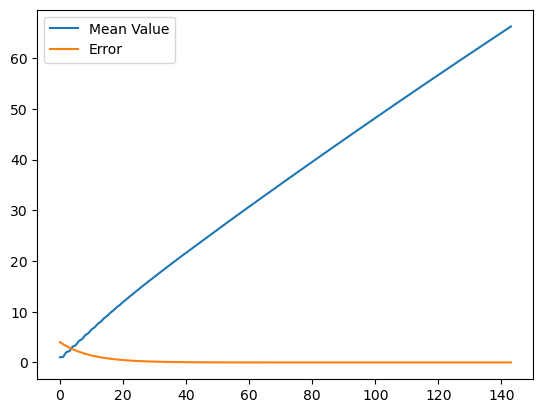

In [217]:
plot_df['Mean Value'] = pd.Series(vi_mean_v)
plot_df['Error'] = pd.Series(vi_error)
plot_df.plot()

<AxesSubplot:>

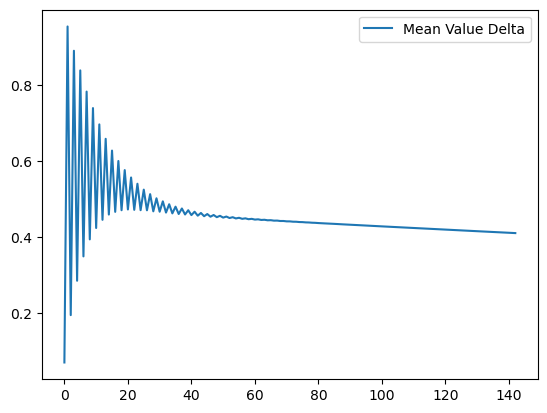

In [218]:
plot_df = pd.DataFrame(index=range(200))

plot_df['Mean Value'] = pd.Series(vi_mean_v)
plot_df['Error'] = pd.Series(vi_error)
plot_df['Mean Value Delta'] = plot_df['Mean Value'].diff().shift(-1)
plot_df = plot_df.drop(['Mean Value', 'Error'], axis=1)
plot_df.plot()

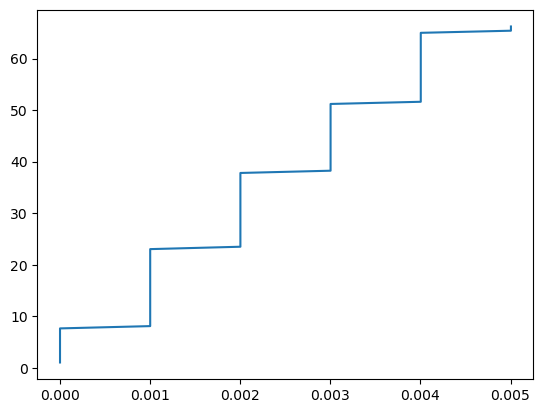

In [219]:
plot_df = pd.DataFrame(index=range(200))

plt.plot(vi_time, vi_mean_v)

#### Gamma Experiments

In [220]:
index = [.8, .9, .99, .999, .9999]

plot_df = pd.DataFrame(index=range(200))
reward_df = pd.DataFrame(index=range(200))
error_df = pd.DataFrame(index=range(200))

times = []

for i in index:
    vi = mdp.mdp.ValueIteration(P, R, i, max_iter=1000000, epsilon=.000001)
    results = vi.run()
    plot_df[i] = pd.Series([x['Mean V'] for x in results])
    error_df[i] = pd.Series([x['Error'] for x in results])
    reward_df[i] = pd.Series([x['Reward'] for x in results])
    times.append([x['Time'] for x in results])

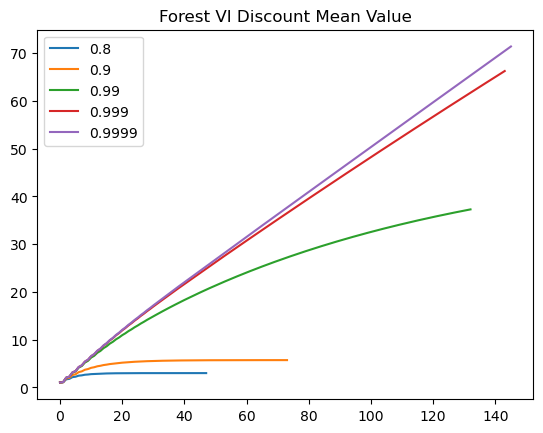

In [221]:
plot_df.plot(title='Forest VI Discount Mean Value')
plt.savefig('forestvidiscountmeanvalue.png', format='png')

In [222]:
index = [.8, .9, .99, .999, .9999]

plot_df = pd.DataFrame(index=range(200))

for i in index:
    vi = mdp.mdp.ValueIteration(P, R, i, max_iter=1000000, epsilon=.000001)
    results = vi.run()    
    plot_df[i] = pd.Series([x['Mean V'] for x in results])
    error_df[i] = pd.Series([x['Error'] for x in results])
    reward_df[i] = pd.Series([x['Reward'] for x in results])
    plot_df[f'{i} Delta'] = plot_df[i].diff().shift(-1)
    plot_df = plot_df.drop([i], axis=1)

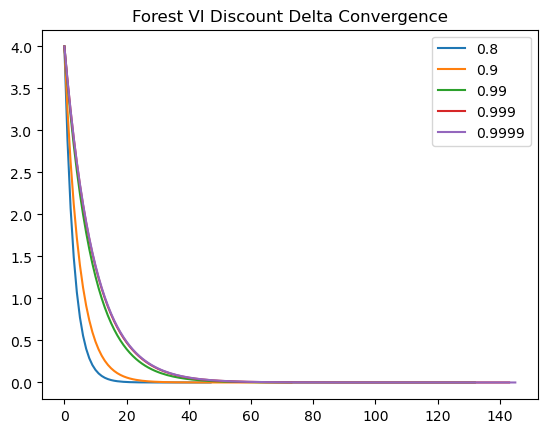

In [223]:
error_df.plot(title='Forest VI Discount Delta Convergence')
plt.savefig('forestvidiscountreward.png', format='png')

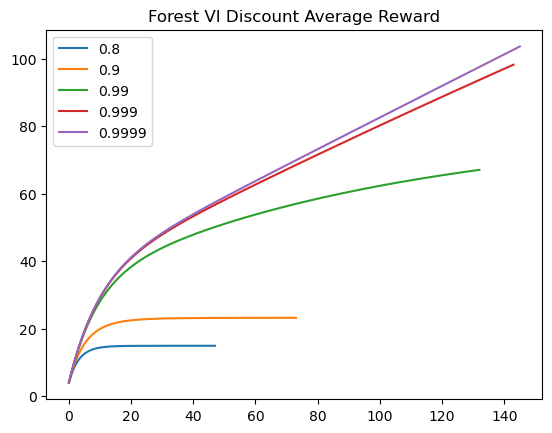

In [224]:
reward_df.plot(title='Forest VI Discount Average Reward')
plt.savefig('forestvidiscountdelta.png', format='png')

#### Policy Visualization

#### Intermittent Iteration Evaluation

In [225]:
iterations = [1, 5, 10, 20, 80, 200, 1000]
policies = []

for max_iteration in iterations:
    vi_run = mdp.mdp.ValueIteration(P, R, .999, max_iter=max_iteration, epsilon=.000001) # Discount set to 1 to look at intermittent steps
    vi_run.run()
    policies.append(vi_run.policy)

In [226]:
for value, p in zip(iterations, policies):
    print(value, p, sum(p))

1 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 79
5 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 79
10 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 79
20 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Policy Iteration

In [227]:
plot_df = pd.DataFrame(index=range(20))
start = time.time()
pi = mdp.mdp.PolicyIteration(P, R, .999, max_iter=200, eval_type=1)

results = pi.run()
run_time = time.time() - start
print(run_time)
print(results[-1]['Reward'])

pi_mean_v = [x['Mean V'] for x in results]
pi_error = [x['Error'] for x in results]
pi_time = [x['Time'] for x in results]

print(sum(pi.policy))
print(pi.policy)

0.9979066848754883
508.3644793175274
79
(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)


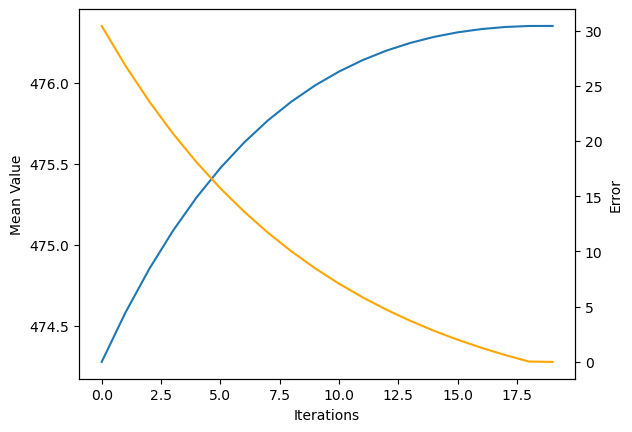

In [228]:
plot_df['Mean Value'] = pd.Series(pi_mean_v)
plot_df['Error'] = pd.Series(pi_error)
fig, ax = plt.subplots()
ax.plot(plot_df['Mean Value'])
ax.set_xlabel('Iterations')
ax.set_ylabel('Mean Value')

ax2 = ax.twinx()
ax2.plot(plot_df['Error'], color='orange')
ax2.set_ylabel('Error')
plt.show()

<AxesSubplot:>

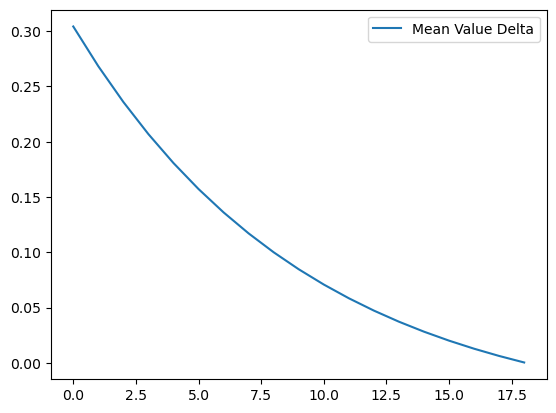

In [229]:
plot_df['Mean Value'] = pd.Series(pi_mean_v)
plot_df['Mean Value Delta'] = plot_df['Mean Value'].diff().shift(-1)
plot_df = plot_df.drop(['Mean Value', 'Error'], axis=1)
plot_df.plot()

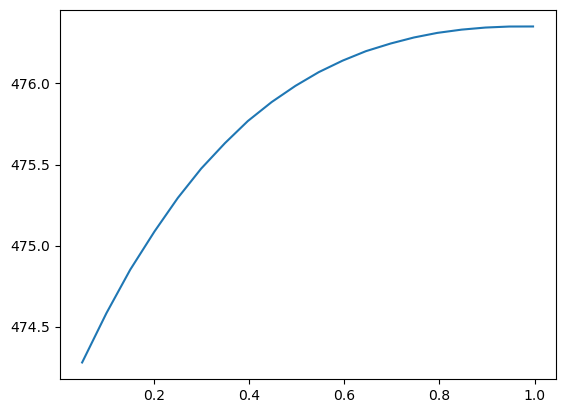

In [230]:
pi_time = [x['Time'] for x in results]
mean_v = [x['Mean V'] for x in results]

plt.plot(pi_time, pi_mean_v)

#### Gamma Experiments

In [231]:
index = [.8, .9, .99, .999]

plot_df = pd.DataFrame(index=range(200))
error_df = pd.DataFrame(index=range(200))
reward_df = pd.DataFrame(index=range(200))

for gamma in index:
    pi2 = mdp.mdp.PolicyIteration(P, R, gamma, max_iter=40, eval_type='iterative')
    results = pi2.run()    
    print(pi2.policy)
    print(gamma)
    plot_df[gamma] = pd.Series([x['Mean V'] for x in results])
    error_df[gamma] = pd.Series([x['Error'] for x in results])
    reward_df[gamma] = pd.Series([x['Reward'] for x in results])
#     plot_df[f'{i} Delta'] = plot_df[i].diff().shift(-1)
#     plot_df = plot_df.drop([i], axis=1)

(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0)
0.8
(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
0.9
(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
0.99
(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

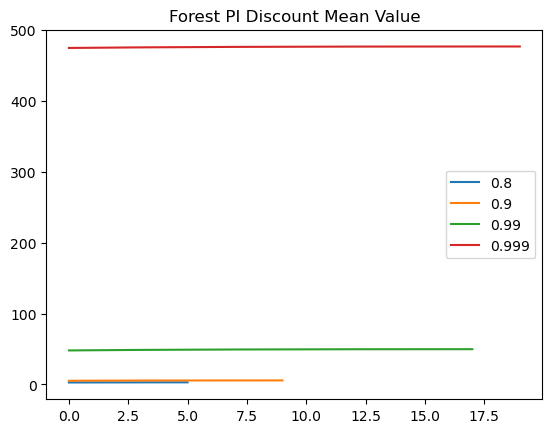

In [232]:
plot_df.plot(title='Forest PI Discount Mean Value')
plt.savefig('forestpidiscountmeanvalue.png', format='png')

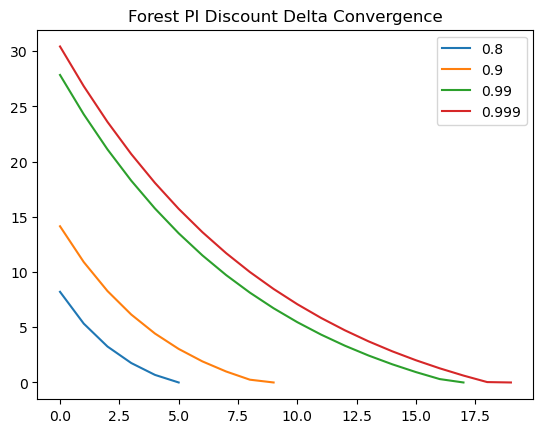

In [233]:
error_df.plot(title='Forest PI Discount Delta Convergence')
plt.savefig('forestpidiscountdelta.png', format='png')

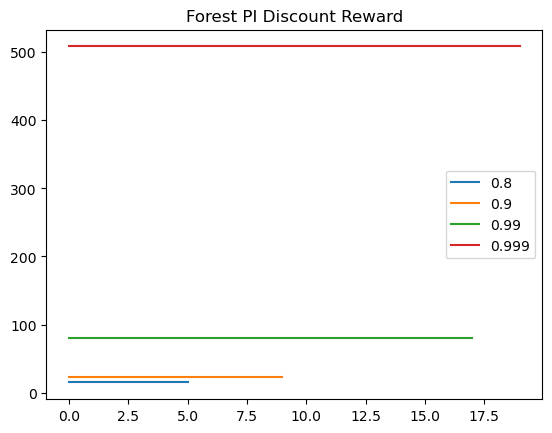

In [234]:
reward_df.plot(title='Forest PI Discount Reward')
plt.savefig('forestpidiscountreward.png', format='png')

#### Policy Visualization

#### Intermittent Iteration Evaluation

In [235]:
iterations = [1, 2, 4, 7, 8, 10, 20, 30, 40, 100]
pi_results = []

for max_iteration in iterations:
    pi_run = mdp.mdp.PolicyIteration(P, R, .999, max_iter=max_iteration) # Discount set to 1 to look at intermittent steps
    pi_run.run()
    pi_results.append(pi_run)

In [236]:
for value, policy in zip(iterations, pi_results):
    print(value, policy.policy, sum(policy.policy))

1 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0) 98
2 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0) 97
4 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0) 95
7 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

### Q Learning

In [237]:
import time
plot_df = pd.DataFrame(index=range(1000000))
start = time.time()
ql = mdp.mdp.QLearning(
    P, 
    R, 
    .999,
    alpha=.9,
    alpha_decay=.99997,
    alpha_min=.01,
    epsilon=1.0,
    epsilon_min=.3,
    epsilon_decay=.999,
    n_iter=100000,
    run_stat_frequency=1,
    iter_callback=callback
)
results = ql.run()
print(time.time() - start)

print(sum(ql.policy))
print(ql.policy)

print('Mean Value:', results[-1]['Mean V'])

ql_mean_v = [x['Mean V'] for x in results]
ql_error = [x['Error'] for x in results]
ql_time = [x['Time'] for x in results]

3.804044246673584
79
(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Mean Value: 100.93769418007462


In [238]:
sys.getsizeof(ql.Q)

1720

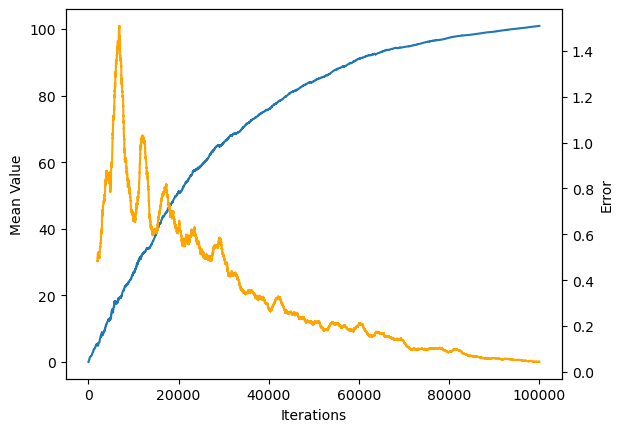

In [239]:
plot_df['Mean Value'] = pd.Series(ql_mean_v)
plot_df['Error'] = pd.Series(ql_error).rolling(2000).mean()

fig, ax = plt.subplots()
ax.plot(plot_df['Mean Value'])
ax.set_xlabel('Iterations')
ax.set_ylabel('Mean Value')

ax2 = ax.twinx()
ax2.plot(plot_df['Error'], color='orange')
ax2.set_ylabel('Error')
plt.show()

#### HP Tuning 

##### Discount

In [240]:
index = [.8, .9, .95, .99, .999]

plot_df = pd.DataFrame(index=range(200000))
error_df = pd.DataFrame(index=range(200000))
reward_df = pd.DataFrame(index=range(200000))

times = []
policies = []
for gamma in index:
    ql = mdp.mdp.QLearning(
        P, 
        R, 
        gamma,
        alpha=.9,
        alpha_decay=.99997,
        alpha_min=.3,
        epsilon=1.0,
        epsilon_min=.1,
        epsilon_decay=.999,
        n_iter=100000, 
        run_stat_frequency=1,
        iter_callback=callback
    )
    start = time.time()
    results = ql.run()
    policies.append(ql.policy)
    print(time.time() - start)
    reward_df[gamma] = pd.Series([x['Reward'] for x in results])
    plot_df[gamma] = pd.Series([x['Mean V'] for x in results])
    error_df[gamma] = pd.Series([x['Error'] for x in results])
    times.append([x['Time'] for x in results])

3.493703842163086
3.51904296875
3.590261220932007
3.6599042415618896
3.701612710952759


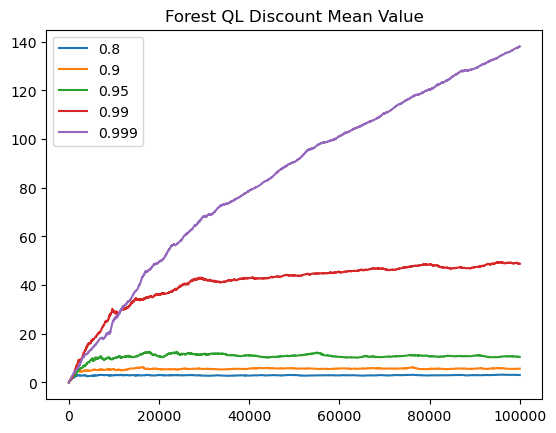

In [241]:
plot_df.plot(title='Forest QL Discount Mean Value')
plt.savefig(f'forestqldiscountmeanvalue.png', format='png')

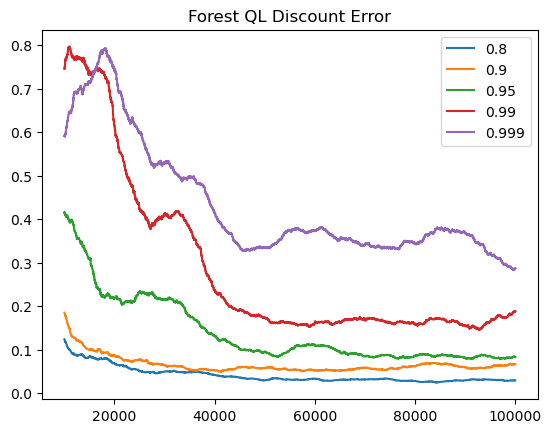

In [242]:
error_df.rolling(10000).mean().plot(title='Forest QL Discount Error')
plt.savefig(f'forestqldiscountdelta.png', format='png')

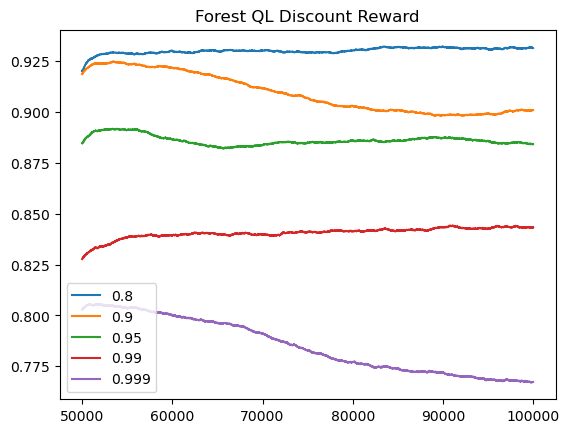

In [243]:
reward_df.rolling(50000).mean().plot(title='Forest QL Discount Reward')
plt.savefig(f'forestqldiscountreward.png', format='png')

In [244]:
for value, policy in zip(index, policies):
    print(value, policy)

0.8 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0)
0.9 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
0.95 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
0.99 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

##### Alpha

In [245]:
index = [.9, .3, .1, .01]

plot_df = pd.DataFrame(index=range(200000))
error_df = pd.DataFrame(index=range(200000))
reward_df = pd.DataFrame(index=range(200000))


times = []
policies = []
for i in index:
    ql = mdp.mdp.QLearning(
        P, 
        R, 
        .9,
        alpha=i,
        alpha_decay=.99997,
        alpha_min=.3,
        epsilon=1.0,
        epsilon_min=.1,
        epsilon_decay=.999,
        n_iter=100000, 
        run_stat_frequency=1,
        iter_callback=callback
    )
    start = time.time()
    results = ql.run()
    policies.append(ql.policy)
    print(time.time() - start)
    reward_df[i] = pd.Series([x['Reward'] for x in results])
    plot_df[i] = pd.Series([x['Mean V'] for x in results])
    error_df[i] = pd.Series([x['Error'] for x in results])
    times.append([x['Time'] for x in results])

3.531404733657837
3.548853635787964
3.5462191104888916
3.525735378265381


<AxesSubplot:title={'center':'Forest QL Discount Error'}>

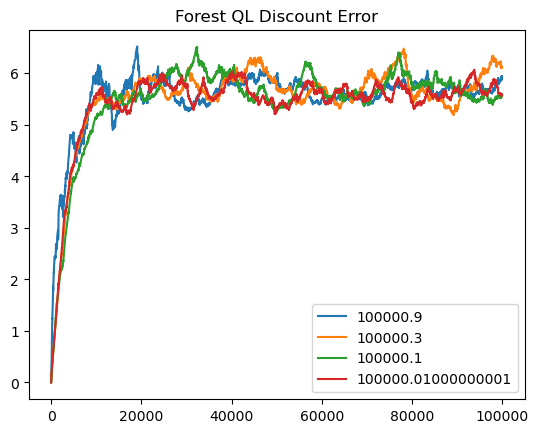

In [246]:
plot_df.plot(title='Forest QL Discount Error')

<AxesSubplot:>

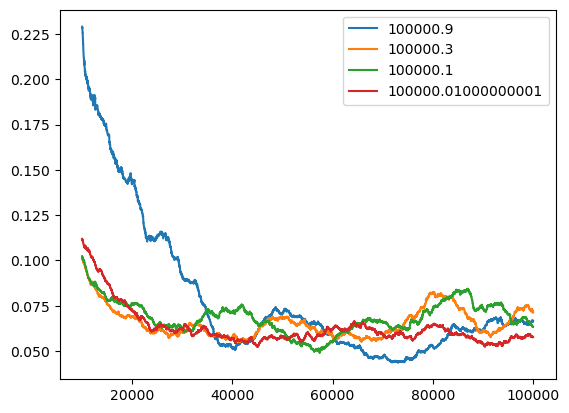

In [247]:
error_df.rolling(10000).mean().plot()

<AxesSubplot:>

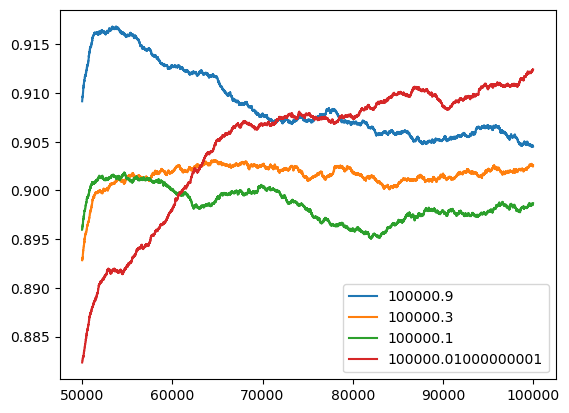

In [248]:
reward_df.rolling(50000).mean().plot()

In [249]:
for value, policy in zip(index, policies):
    print(value, policy)

0.9 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
0.3 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
0.1 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0)
0.01 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

##### Alpha Min

In [250]:
index = [.5, .3, .1, .05, .01, .001]

plot_df = pd.DataFrame(index=range(100000))
error_df = pd.DataFrame(index=range(100000))
reward_df = pd.DataFrame(index=range(100000))


times = []
policies = []
for i in index:
    ql = mdp.mdp.QLearning(
        P, 
        R, 
        .95,
        alpha=.9,
        alpha_decay=.99997,
        alpha_min=i,
        epsilon=1.0,
        epsilon_min=.1,
        epsilon_decay=.999,
        n_iter=200000, 
        run_stat_frequency=1,
        iter_callback=callback
    )
    print(i)
    start = time.time()
    results = ql.run()
    policies.append(ql.policy)
    print(time.time() - start)
    reward_df[i] = pd.Series([x['Reward'] for x in results])
    plot_df[i] = pd.Series([x['Mean V'] for x in results])
    error_df[i] = pd.Series([x['Error'] for x in results])
    times.append([x['Time'] for x in results])

0.5
7.0847461223602295
0.3
7.1944262981414795
0.1
7.281320333480835
0.05
7.29358696937561
0.01
7.2470221519470215
0.001
7.271648168563843


<AxesSubplot:>

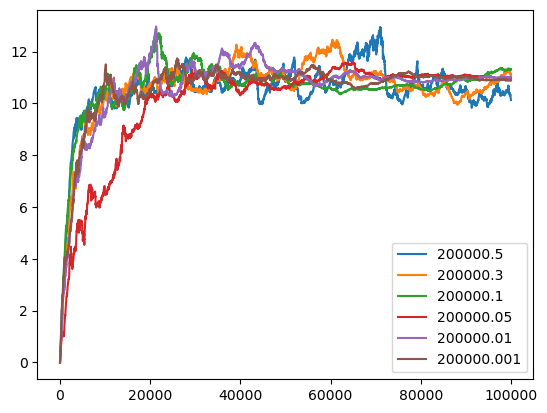

In [251]:
plot_df.plot()

<AxesSubplot:>

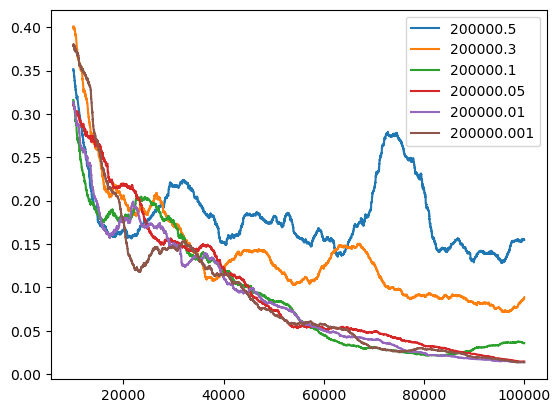

In [252]:
error_df.rolling(10000).mean().plot()

<AxesSubplot:>

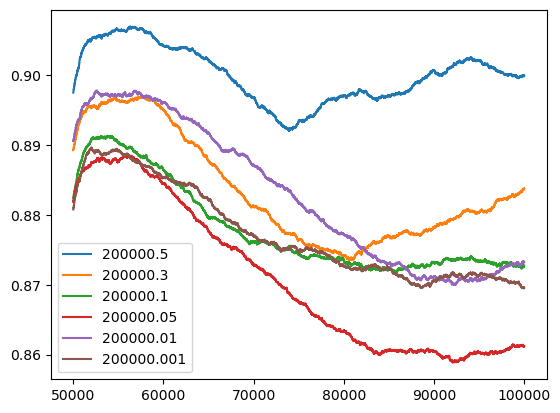

In [253]:
reward_df.rolling(50000).mean().plot()

In [254]:
for value, policy in zip(index, policies):
    print(value, policy)

0.5 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0)
0.3 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
0.1 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
0.05 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

##### Epsilon

In [255]:
index = np.linspace(0, 1, num=4)

plot_df = pd.DataFrame(index=range(200000))
error_df = pd.DataFrame(index=range(200000))
reward_df = pd.DataFrame(index=range(200000))


times = []
policies = []
for epsilon in index:
    ql = mdp.mdp.QLearning(
        P, 
        R, 
        .95, 
        alpha=.9,
        alpha_decay=.99997,
        alpha_min=.5,
        epsilon=epsilon,
        epsilon_min=.1,
        epsilon_decay=.99999,
        n_iter=100000, 
        run_stat_frequency=1,
        iter_callback=callback
    )
    start = time.time()
    results = ql.run()
    policies.append(ql.policy)
    print(time.time() - start)
    reward_df[epsilon] = pd.Series([x['Reward'] for x in results])
    plot_df[epsilon] = pd.Series([x['Mean V'] for x in results])
    error_df[epsilon] = pd.Series([x['Error'] for x in results])
    times.append([x['Time'] for x in results])

3.6288180351257324
3.645972728729248
3.7053284645080566
3.8537728786468506


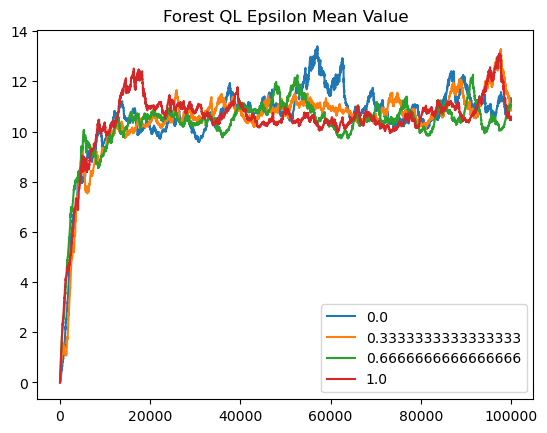

In [256]:
plot_df.plot(title='Forest QL Epsilon Mean Value')
plt.savefig('forestqlepsilonmeanvalue.png', format='png')

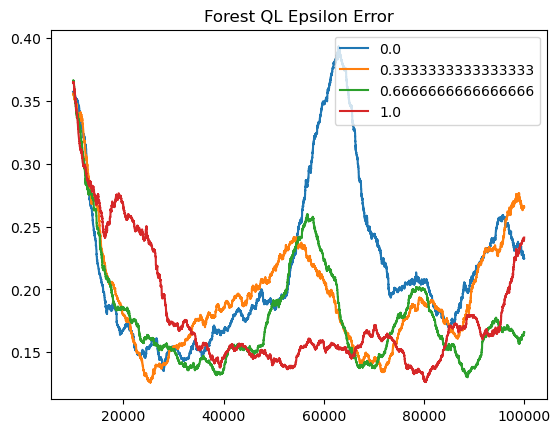

In [257]:
error_df.rolling(10000).mean().plot(title='Forest QL Epsilon Error')
plt.savefig('forestqlepsilondelta.png', format='png')

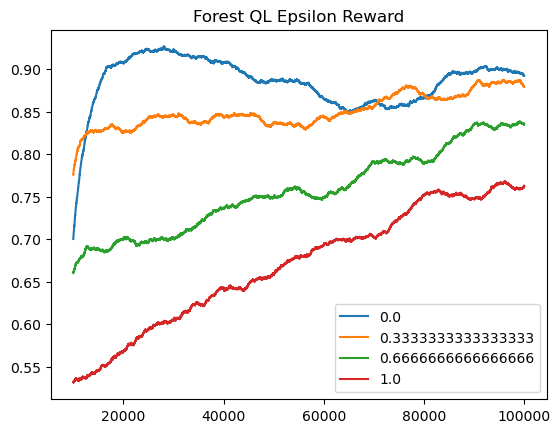

In [258]:
reward_df.rolling(10000).mean().plot(title='Forest QL Epsilon Reward')
plt.savefig('forestqlepsilonreward.png', format='png')

In [259]:
for value, policy in zip(index, policies):
    print(value, policy, sum(policy))

0.0 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 88
0.3333333333333333 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 86
0.6666666666666666 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 89
1.0 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

##### Epsilon Min

In [260]:
index = [1, .5, .1, .01]

plot_df = pd.DataFrame(index=range(200000))
error_df = pd.DataFrame(index=range(200000))
reward_df = pd.DataFrame(index=range(200000))


times = []
policies = []
for e_min in index:
    ql = mdp.mdp.QLearning(
        P, 
        R, 
        .95,
        alpha=.9,
        alpha_decay=.99997,
        alpha_min=.5,
        epsilon=.3,
        epsilon_min=e_min,
        epsilon_decay=.999,
        n_iter=100000, 
        run_stat_frequency=1,
        iter_callback=callback
    )
    start = time.time()
    results = ql.run()
    policies.append(ql.policy)
    print(time.time() - start)
    reward_df[e_min] = pd.Series([x['Reward'] for x in results])
    plot_df[e_min] = pd.Series([x['Mean V'] for x in results])
    error_df[e_min] = pd.Series([x['Error'] for x in results])
    times.append([x['Time'] for x in results])

4.025106191635132
3.8196029663085938
3.5957276821136475
3.6637156009674072


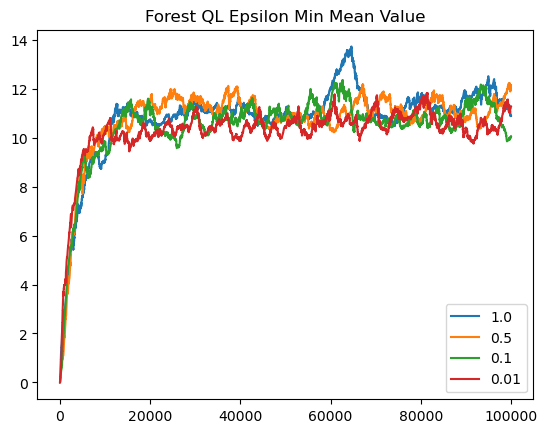

In [261]:
plot_df.plot(title='Forest QL Epsilon Min Mean Value')
plt.savefig('forestqlepsilonminmeavvalue.png', format='png')

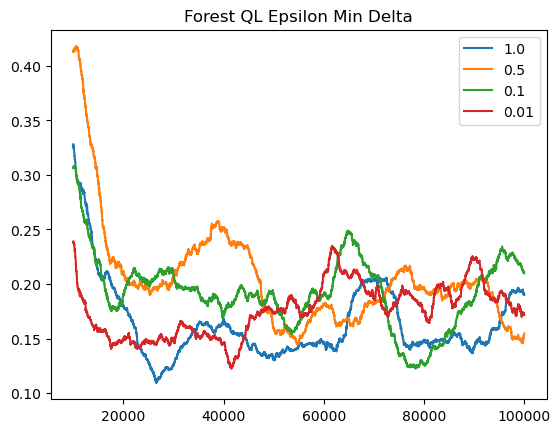

In [262]:
error_df.rolling(10000).mean().plot(title='Forest QL Epsilon Min Delta')
plt.savefig('forestqlepsilonmindelta.png', format='png')

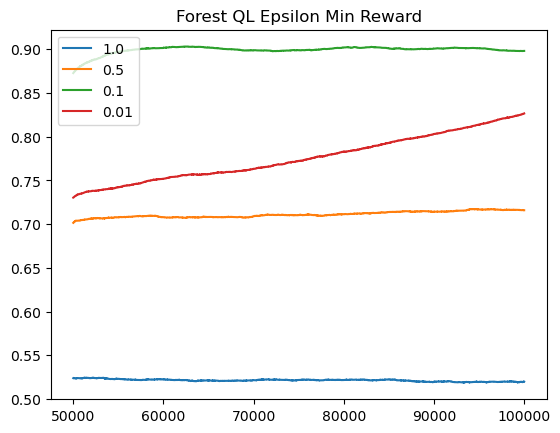

In [263]:
reward_df.rolling(50000).mean().plot(title='Forest QL Epsilon Min Reward')
plt.savefig('forestqlepsilonminreward.png', format='png')

In [264]:
for value, policy in zip(index, policies):
    print(value, policy, sum(policy))

1 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 81
0.5 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 86
0.1 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0) 95
0.01 (0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 

#### Intermittent Iteration Evaluation

In [265]:
iterations = [10000, 20000, 50000, 100000, 200000, 1000000]
ql_results = []

policies = []

reward_df = pd.DataFrame(index=range(1000000))

for max_iteration in iterations:
    ql = mdp.mdp.QLearning(
        P, 
        R, 
        .95,
        alpha=.9,
        alpha_decay=.99997,
        alpha_min=.5,
        epsilon=1.0,
        epsilon_min=.1,
        epsilon_decay=.999,
        n_iter=max_iteration,
        run_stat_frequency=1,
        iter_callback=callback
    )
    start = time.time()
    results = ql.run()
    policies.append(ql.policy)
    reward_df[i] = pd.Series([x['Reward'] for x in results])
    print(time.time() - start)
    ql_results.append(ql)

0.3934035301208496
0.7023766040802002
1.7823562622070312
3.4862468242645264
7.014538288116455
35.52196025848389


In [266]:
for value, policy in zip(iterations, policies):
    print(value, policy, sum(policy))

10000 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0) 92
20000 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 89
50000 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0) 91
100000 (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,